## Microarray analyses for C.glutamicum

In [1]:
%matplotlib inline
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We have already processed the initial table in a way that: 
* it is filled by numeric values
* formated to tab-separated version (.tsv)

Now we download the table as DataFrame:

In [2]:
PATH_TABLE = '/hdd/projects/angela_metaanalyses/data/preprocessed.tsv'
df = pd.read_csv(PATH_TABLE, index_col = 0, sep='\t')


 ## Basic statistics :

In [3]:
print("Number of experiments:\t%d\nNumber of genes:\t%d" % df.shape)
print("Number of experiments with no signal: %d" % len([x for x in df.mean(axis=1) if x==0] ))
print("Number of genes with no signal: %d" % len([x for x in df.mean(axis=0) if x==0] ))

Number of experiments:	403
Number of genes:	3047
Number of experiments with no signal: 1
Number of genes with no signal: 0


## Remove genes and experiments without signal

In [4]:
df = df.loc[(df != 0).any(axis=1)]
df = df.loc[:, (df != 0).any(axis=0)]
print("Number of experiments:\t%d\nNumber of genes:\t%d" % df.shape)

Number of experiments:	402
Number of genes:	3047


## Experiments basic statistics:

In [5]:
def draw_stat_intensity_histogram(df, func, axis_num, label, stat_label, percentile, bins):
    values = df.apply(func, axis=axis_num)
    resolution_limit = np.percentile(values, percentile)
    resolution = [x for x in values if x <= resolution_limit]

    fig, axes = plt.subplots(1,2, figsize=(12,4))
    fig.suptitle("%s [%s]" % (label, stat_label))
    for ax, mylist, title in zip(axes, [values, resolution], ['all', 'lower %d%%' % percentile]):
        ax.set_ylabel("Number of %s" % label)
        ax.set_xlabel("%s [%s]" % (stat_label, title))
        ax.hist(mylist, bins = bins);





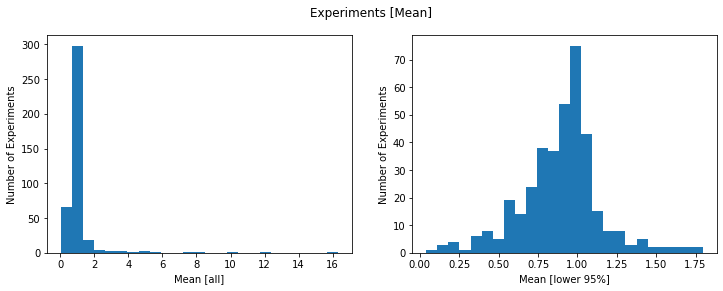

In [6]:
draw_stat_intensity_histogram(df, np.mean, 1, "Experiments", "Mean", 95, 25)

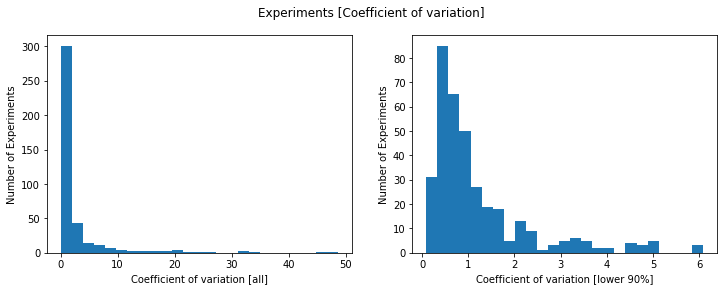

In [7]:
draw_stat_intensity_histogram(df, scs.variation, 1, "Experiments", "Coefficient of variation", 90, 25)


## Genes basic statistics:

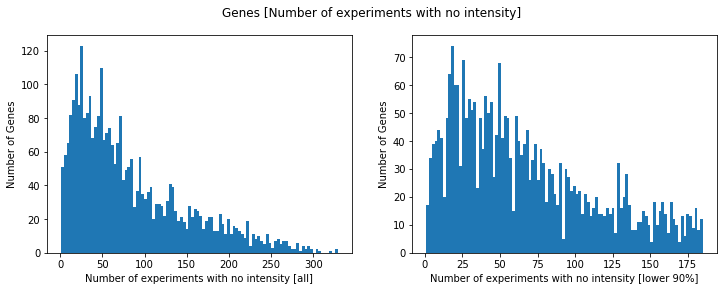

In [8]:
def count_zeros(mylist):
    return len([x for x in mylist if x == 0])

draw_stat_intensity_histogram(df, count_zeros, 0, "Genes", "Number of experiments with no intensity", 90, 100)

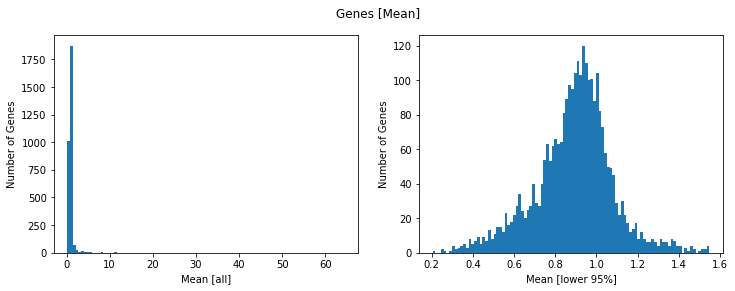

In [9]:
draw_stat_intensity_histogram(df, np.mean, 0, "Genes", "Mean", 95, 100)

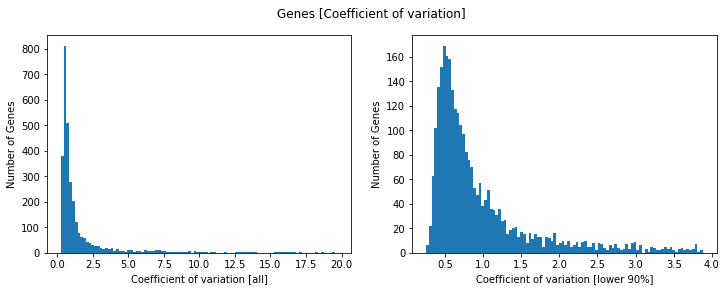

In [10]:
draw_stat_intensity_histogram(df, scs.variation, 0, "Genes", "Coefficient of variation", 90, 100)

Pearson correlation: 0.5472


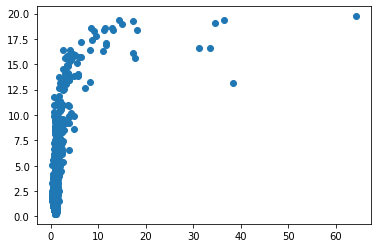

In [28]:
gene_variations = df.apply(scs.variation, axis=0)
gene_means = df.apply(np.mean, axis=0)
print("Pearson correlation: %1.4f" % scs.pearsonr(gene_means, gene_variations)[0])
plt.scatter(gene_means, gene_variations);
#plt.clf()

In [21]:
GENES_MIN_MEAN = 0.8
GENES_MAX_MEAN = 1000000

def filter_genes_mean(mylist):
    mymean = np.mean(mylist)
    return(mymean >= GENES_MIN_MEAN and mymean <= GENES_MAX_MEAN)


EXP_MIN_MEAN = 0.6
EXP_MAX_MEAN = 2

def filter_exp_mean(mylist):
    mymean = np.mean(mylist)
    return(mymean >= EXP_MIN_MEAN and mymean <= EXP_MAX_MEAN)

central_df = df.loc[:, df.apply(filter_genes_mean, axis=0)]
central_df = central_df.loc[central_df.apply(filter_exp_mean, axis=1)]
print("Number of experiments:\t%d\nNumber of genes:\t%d" % central_df.shape)



Number of experiments:	352
Number of genes:	2274


We split the DataFrame into:
* microarray intensities (DataFrame values) as numpy array
* experiment names (DataFrame rows) as list
* gene names (DataFrame columns) as list